In [1]:
#importing for pandas

import pandas as pd

In [2]:
#Q1- Read the student grades as a pandas data frame. How many rows are in this data frame?


dfa = pd.read_csv("student-mat.csv")
dfa.info()
#There area 395 rows in the dataframe

#Q2 - How many columns are in this dataset?
# there are 31 columns in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [3]:
#Q3-(Part a) What is the average age of the students in this dataset? Enter the answer with four significant digits.

dfa['age'].mean()
#Answer 16.6962

16.696202531645568

In [4]:
#Q4(Part a) What is the average freetime in this dataset? Enter the answer with four significant digits.
dfa['freetime'].mean()

#Answer 3.235

3.2354430379746835

In [5]:
#Q5(Part a) What is the ratio of Grade 'A' to Grade 'F' in this dataset? Enter the answer with four significant digits


#dfa.groupby(['grade']).count()
c=dfa['grade'].value_counts()
c.loc['A']/c.loc['F']
#0.7681

0.7681159420289855

In [6]:
#Q6 (Part a) How many female students received Grade B or higher?

dfa['grade'].unique() 
dffa=dfa[(dfa['sex']=='F') &  (dfa['grade'] == 'A')]
dffb=dfa[(dfa['sex']=='F') & (dfa['grade'] == 'B')]
a = dffa.count()
b = dffb.count()
a+b
#There are total 74 such females with 

school        74
sex           74
age           74
address       74
famsize       74
Pstatus       74
Medu          74
Fedu          74
Mjob          74
Fjob          74
reason        74
guardian      74
traveltime    74
studytime     74
failures      74
schoolsup     74
famsup        74
paid          74
activities    74
nursery       74
higher        74
internet      74
romantic      74
famrel        74
freetime      74
goout         74
Dalc          74
Walc          74
health        74
absences      74
grade         74
dtype: int64

In [7]:
#Q7-(Part a) If we consider the following numerical grade assignment, 
#what is the average grade of female students in this dataset? Enter the answer with 4 significant digits.
#A: 4
#B: 3
#C: 2
#F: 1

f=dfa[(dfa['sex']=='F')]
count =f.count()
fg=f['grade'].value_counts()
print(fg)
a=fg.loc['A']*4
print(a)
b=fg.loc['B']*3

c=fg.loc['C']*2
f=fg.loc['F']*1

avg= (a+b+c+f)/208
avg
#433.1923076923077


C    94
B    51
F    40
A    23
Name: grade, dtype: int64
92


2.2740384615384617

In [8]:
dfb = pd.read_csv("Nutritional Data for Fast Foods.csv")
dfb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
Unnamed: 0              126 non-null int64
Fast Food Restaurant    126 non-null object
Item                    126 non-null object
Type                    126 non-null object
Serving Size (g)        126 non-null int64
Calories                126 non-null int64
Total Fat (g)           122 non-null float64
Saturated Fat (g)       126 non-null float64
Trans Fat (g)           114 non-null float64
Sodium (mg)             121 non-null float64
Carbs (g)               126 non-null float64
Sugars (g)              126 non-null float64
Protein (g)             122 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 12.9+ KB


In [9]:
# question 9(Part b) How many unique values are in the column Item?
dfb['Item'].nunique()

101

In [10]:
#(Part b) How many unique values are in column Type?
dfb['Type'].nunique()

6

In [11]:
#Question11(Part b) Use a groupby statement to find the average calorie for each food type. 
#What is the average calorie for French Fries?
#(enter the answer with 2 significant digits)
import numpy as np
n = dfb.groupby('Type')
print(n['Calories'].agg(np.mean))

Type
Breaded Chicken Sandwich    522.090909
Burger                      620.202899
Chicken Nuggets             274.545455
French Fries                314.083333
Grilled Chicken Sandwich    408.000000
Milkshake                   606.666667
Name: Calories, dtype: float64


In [12]:
#(Part b) Which fast-food restaurant has the Burger with the highest protein per serving?
n = dfb.groupby['Type']=='Burger']
print(n['Calories'].agg(np.mean))

SyntaxError: invalid syntax (<ipython-input-12-db35bede8445>, line 2)

In [13]:
#QUESTION 1
#(Part a) In this lab, you will prepare your dataset for Machine Learning models. 
#Our goal is to replace the none-numerical values with meaningful numerical representation.
#In any of the following questions, if you have decided to map an ordinal column with ordinal values, 
#we always map the least frequent to 0, the next lowest frequent value to 1 and so on.
#What would be a meaningful data transformation for column school? (apply the data transformation on this dataset)
dfa['school'].value_counts() # tell us the frequency of the of the school : GP    349 MS     46

school_dummies = pd.get_dummies(dfa.school)
school_dummies.head()

dfa_1 = pd.concat([school_dummies,dfa],axis ='columns') #concatnating the dummy and the original Data Frame
dfa_1.drop('school',axis = 'columns',inplace = True) # dropping the school column
dfa_1.head()

#Answer is Map GP to 1 and MS to 0.


,GP,MS,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,1,0,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,F
1,1,0,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,F
2,1,0,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,C
3,1,0,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,B
4,1,0,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,C


In [14]:
#Question 2
#(Part a) What would be a meaningful data transformation for column sex? (apply the data transformation on this dataset)

dfa_1['sex'].value_counts()# F    208 M    187

sex_dummies = pd.get_dummies(dfa_1.sex)
sex_dummies

dfa_2 = pd.concat([sex_dummies,dfa_1],axis ='columns')
dfa_2.drop('sex',axis = 'columns',inplace = True)
dfa_2

#Answer is Map M to 0 and F to 1

,F,M,GP,MS,age,address,famsize,Pstatus,Medu,Fedu,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,1,0,1,0,18,U,GT3,A,4,4,...,no,no,4,3,4,1,1,3,6,F
1,1,0,1,0,17,U,GT3,T,1,1,...,yes,no,5,3,3,1,1,3,4,F
2,1,0,1,0,15,U,LE3,T,1,1,...,yes,no,4,3,2,2,3,3,10,C
3,1,0,1,0,15,U,GT3,T,4,2,...,yes,yes,3,2,2,1,1,5,2,B
4,1,0,1,0,16,U,GT3,T,3,3,...,no,no,4,3,2,1,2,5,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,20,U,LE3,A,2,2,...,no,no,5,5,4,4,5,4,11,C
391,0,1,0,1,17,U,LE3,T,3,1,...,yes,no,2,4,5,3,4,2,3,A
392,0,1,0,1,21,R,GT3,T,1,1,...,no,no,5,5,3,3,3,3,3,C
393,0,1,0,1,18,R,LE3,T,3,2,...,yes,no,4,4,1,3,4,5,0,C


In [15]:
#QUESTION 3
#(Part a) What would be a meaningful data transformation for column address?
#(apply the data transformation on this dataset)

dfa_2['address'].value_counts() #U    307 R     88
add_dummies = pd.get_dummies(dfa_2.address) # getting the dummies values of address
add_dummies 

dfa_3 = pd.concat([add_dummies,dfa_2],axis ='columns')
dfa_3.drop('address',axis = 'columns',inplace = True)
dfa_3.head()

#Answer is Map R to 0 and U to 1.

,R,U,F,M,GP,MS,age,famsize,Pstatus,Medu,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,0,1,1,0,1,0,18,GT3,A,4,...,no,no,4,3,4,1,1,3,6,F
1,0,1,1,0,1,0,17,GT3,T,1,...,yes,no,5,3,3,1,1,3,4,F
2,0,1,1,0,1,0,15,LE3,T,1,...,yes,no,4,3,2,2,3,3,10,C
3,0,1,1,0,1,0,15,GT3,T,4,...,yes,yes,3,2,2,1,1,5,2,B
4,0,1,1,0,1,0,16,GT3,T,3,...,no,no,4,3,2,1,2,5,4,C


In [16]:
#QUESTION 4

#(Part a) What would be a meaningful data transformation for column famsize?
#(apply the data transformation on this dataset)

dfa_3['famsize'].value_counts() #GT3    281 LE3    114

dfa_3['famsize'].replace({'GT3':'1','LE3':'0'},inplace = True) # replacing 'GT3':'1','LE3':'0' inplace true
dfa_3

#Answer is Map GT3 to 1 and LE3 to 0.
#dfa_3 is my base dataframe

,R,U,F,M,GP,MS,age,famsize,Pstatus,Medu,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,0,1,1,0,1,0,18,1,A,4,...,no,no,4,3,4,1,1,3,6,F
1,0,1,1,0,1,0,17,1,T,1,...,yes,no,5,3,3,1,1,3,4,F
2,0,1,1,0,1,0,15,0,T,1,...,yes,no,4,3,2,2,3,3,10,C
3,0,1,1,0,1,0,15,1,T,4,...,yes,yes,3,2,2,1,1,5,2,B
4,0,1,1,0,1,0,16,1,T,3,...,no,no,4,3,2,1,2,5,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,0,1,20,0,A,2,...,no,no,5,5,4,4,5,4,11,C
391,0,1,0,1,0,1,17,0,T,3,...,yes,no,2,4,5,3,4,2,3,A
392,1,0,0,1,0,1,21,1,T,1,...,no,no,5,5,3,3,3,3,3,C
393,1,0,0,1,0,1,18,0,T,3,...,yes,no,4,4,1,3,4,5,0,C


In [17]:
#QUESTION 5
#(Part a) What would be a meaningful data transformation for column Pstatus?
#(apply the data transformation on this dataset)
dfa_3['Pstatus'].value_counts()#T    354 #A     41

pstatus_dummies = pd.get_dummies(dfa_3.Pstatus)
pstatus_dummies
dfa_4 =pd.concat([pstatus_dummies,dfa_3],axis ='columns')
dfa_4.drop('Pstatus',axis = 'columns',inplace = True)
dfa_4.head()

#Answer is Map A to 0 and T to 1.

,A,T,R,U,F,M,GP,MS,age,famsize,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,1,0,0,1,1,0,1,0,18,1,...,no,no,4,3,4,1,1,3,6,F
1,0,1,0,1,1,0,1,0,17,1,...,yes,no,5,3,3,1,1,3,4,F
2,0,1,0,1,1,0,1,0,15,0,...,yes,no,4,3,2,2,3,3,10,C
3,0,1,0,1,1,0,1,0,15,1,...,yes,yes,3,2,2,1,1,5,2,B
4,0,1,0,1,1,0,1,0,16,1,...,no,no,4,3,2,1,2,5,4,C


In [18]:
#QUESTION 6
#(Part a) What would be a meaningful data transformation for column Mjob? 
#(apply the data transformation on this dataset)

dfa_4['Mjob'].value_counts()

Mjob_dummies = pd.get_dummies(dfa_4.Mjob)
Mjob_dummies

dfa_5 =pd.concat([Mjob_dummies,dfa_4],axis ='columns')
dfa_5.drop('Mjob',axis = 'columns',inplace = True)
dfa_5.head()


dfa_5.rename(columns = {'at_home':'M_at_home','health':'M_health','other':'M_other','services':'M_services','teacher':'M_teacher'}, inplace = True)
dfa_5.head()
#Answer is Replace each value with a one-hot-vector of length 5.

,M_at_home,M_health,M_other,M_services,M_teacher,A,T,R,U,F,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,M_health,absences,grade
0,1,0,0,0,0,1,0,0,1,1,...,no,no,4,3,4,1,1,3,6,F
1,1,0,0,0,0,0,1,0,1,1,...,yes,no,5,3,3,1,1,3,4,F
2,1,0,0,0,0,0,1,0,1,1,...,yes,no,4,3,2,2,3,3,10,C
3,0,1,0,0,0,0,1,0,1,1,...,yes,yes,3,2,2,1,1,5,2,B
4,0,0,1,0,0,0,1,0,1,1,...,no,no,4,3,2,1,2,5,4,C


In [19]:
#QUESTION 7
#(Part a) What would be a meaningful data transformation for column Fjob? 
#(apply the data transformation on this dataset)
dfa_5['Fjob'].value_counts()
Fjob_dummies = pd.get_dummies(dfa_5.Fjob)
Fjob_dummies
dfa_6 =pd.concat([Fjob_dummies,dfa_5],axis ='columns')
dfa_6.drop('Fjob',axis = 'columns',inplace = True)
dfa_6.head()

dfa_6.rename(columns = {'at_home':'F_at_home','health':'F_health','other':'F_other','services':'F_services','teacher':'F_teacher'}, inplace = True)
dfa_6.head()
#Answer is Replace each value with a one-hot-vector of length 5.

,F_at_home,F_health,F_other,F_services,F_teacher,M_at_home,M_health,M_other,M_services,M_teacher,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,M_health,absences,grade
0,0,0,0,0,1,1,0,0,0,0,...,no,no,4,3,4,1,1,3,6,F
1,0,0,1,0,0,1,0,0,0,0,...,yes,no,5,3,3,1,1,3,4,F
2,0,0,1,0,0,1,0,0,0,0,...,yes,no,4,3,2,2,3,3,10,C
3,0,0,0,1,0,0,1,0,0,0,...,yes,yes,3,2,2,1,1,5,2,B
4,0,0,1,0,0,0,0,1,0,0,...,no,no,4,3,2,1,2,5,4,C


In [21]:
#QUESTION 8
#(Part a) What would be a meaningful data transformation for column reason?
#(apply the data transformation on this dataset)

dfa_6['reason'].value_counts() #course 145#home 109#reputation 105 # other 36
reason_dummies = pd.get_dummies(dfa_6.reason)
reason_dummies

dfa_7 =pd.concat([reason_dummies,dfa_6],axis ='columns')
dfa_7.drop('reason',axis = 'columns',inplace = True)

dfa_7.rename(columns = {'other':'Reas_other'},inplace = True)
#Answer is Replace each value with a one-hot-vector of length 4.

In [22]:
#QUESTION 9

#(Part a) What would be a meaningful data transformation for column guardian?
#(apply the data transformation on this dataset)
dfa_7['guardian'].value_counts() #mother 273 #father 90 #other  32
guardian_dummies = pd.get_dummies(dfa_7.guardian)

dfa_8 =pd.concat([guardian_dummies,dfa_7],axis ='columns')

dfa_8.drop('guardian',axis = 'columns',inplace = True)
dfa_8.columns
#Replace each value with a one-hot-vector of length 3

Index(['father', 'mother', 'other', 'course', 'home', 'Reas_other',
       'reputation', 'F_at_home', 'F_health', 'F_other', 'F_services',
       'F_teacher', 'M_at_home', 'M_health', 'M_other', 'M_services',
       'M_teacher', 'A', 'T', 'R', 'U', 'F', 'M', 'GP', 'MS', 'age', 'famsize',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'M_health',
       'absences', 'grade'],
      dtype='object')

In [23]:
#QUESTION 10

#(Part a) What would be a meaningful data transformation for column schoolsup?
#(apply the data transformation on this dataset)

#schoolsup - extra educational support (binary: yes or no)

dfa_8['schoolsup'].value_counts() #no 344 #yes 51
schoolsup_dummies = pd.get_dummies(dfa_8.schoolsup)
schoolsup_dummies

dfa_9 = pd.concat([schoolsup_dummies,dfa_8],axis ='columns')
dfa_9.drop('schoolsup',axis = 'columns',inplace = True)

dfa_9.rename(columns = {'no':'NO_sklup','yes':'YES_sklup'},inplace = True)
dfa_9.columns


Index(['NO_sklup', 'YES_sklup', 'father', 'mother', 'other', 'course', 'home',
       'Reas_other', 'reputation', 'F_at_home', 'F_health', 'F_other',
       'F_services', 'F_teacher', 'M_at_home', 'M_health', 'M_other',
       'M_services', 'M_teacher', 'A', 'T', 'R', 'U', 'F', 'M', 'GP', 'MS',
       'age', 'famsize', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'M_health',
       'absences', 'grade'],
      dtype='object')

In [24]:
#QUESTION 11
#(Part a) What would be a meaningful data transformation for column famsup?
#(apply the data transformation on this dataset)

dfa_9['famsup'].value_counts() #no 153 #yes 242
famsup_dummies = pd.get_dummies(dfa_9.famsup)
dfa_10 = pd.concat([famsup_dummies,dfa_9],axis ='columns')
dfa_10
dfa_10.drop('famsup',axis = 'columns',inplace = True)
dfa_10.rename(columns = {'no':'NO_famsup','yes':'YES_famsup'},inplace = True)
dfa_10.columns
#Ansewr is Replace each value with a one-hot-vector of length 2.

Index(['NO_famsup', 'YES_famsup', 'NO_sklup', 'YES_sklup', 'father', 'mother',
       'other', 'course', 'home', 'Reas_other', 'reputation', 'F_at_home',
       'F_health', 'F_other', 'F_services', 'F_teacher', 'M_at_home',
       'M_health', 'M_other', 'M_services', 'M_teacher', 'A', 'T', 'R', 'U',
       'F', 'M', 'GP', 'MS', 'age', 'famsize', 'Medu', 'Fedu', 'traveltime',
       'studytime', 'failures', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'M_health', 'absences', 'grade'],
      dtype='object')

In [25]:
#QUESTION 12
#(Part a) What would be a meaningful data transformation for column paid?
#(apply the data transformation on this dataset)
dfa_10['paid'].value_counts()# no     214 yes    181
paid_dummies = pd.get_dummies(dfa_10.paid)
dfa_11 = pd.concat([paid_dummies,dfa_10],axis ='columns')
dfa_11.drop('paid',axis = 'columns',inplace = True)
dfa_11.rename(columns = {'no':'NO_paid','yes':'YES_paid'},inplace = True)
dfa_11.columns
#Replace each value with a one-hot-vector of length 2.

Index(['NO_paid', 'YES_paid', 'NO_famsup', 'YES_famsup', 'NO_sklup',
       'YES_sklup', 'father', 'mother', 'other', 'course', 'home',
       'Reas_other', 'reputation', 'F_at_home', 'F_health', 'F_other',
       'F_services', 'F_teacher', 'M_at_home', 'M_health', 'M_other',
       'M_services', 'M_teacher', 'A', 'T', 'R', 'U', 'F', 'M', 'GP', 'MS',
       'age', 'famsize', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'M_health', 'absences', 'grade'],
      dtype='object')

In [33]:
#QUESTION 13
#(Part a) What would be a meaningful data transformation for column activities?
#(apply the data transformation on this dataset)
dfa_11['activities'].value_counts()# no     194 yes    201
paid_activities = pd.get_dummies(dfa_10.activities)

dfa_12 = pd.concat([paid_activities,dfa_10],axis ='columns')
dfa_12.drop('activities',axis = 'columns',inplace = True)
dfa_12.rename(columns = {'no':'NO_activities','yes':'YES_activities'},inplace = True)
dfa_12.columns

Index(['NO_activities', 'YES_activities', 'NO_famsup', 'YES_famsup',
       'NO_sklup', 'YES_sklup', 'father', 'mother', 'other', 'course', 'home',
       'Reas_other', 'reputation', 'F_at_home', 'F_health', 'F_other',
       'F_services', 'F_teacher', 'M_at_home', 'M_health', 'M_other',
       'M_services', 'M_teacher', 'A', 'T', 'R', 'U', 'F', 'M', 'GP', 'MS',
       'age', 'famsize', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'paid', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'M_health', 'absences', 'grade'],
      dtype='object')

In [34]:
#QUESTION 14
#(Part a) What would be a meaningful data transformation for column nursery?
#(apply the data transformation on this dataset)
dfa_12['nursery'].value_counts() #yes    314 #no      81
nursery_dummies = pd.get_dummies(dfa_12.nursery)
nursery_dummies
dfa_13 = pd.concat([nursery_dummies,dfa_12],axis ='columns')
dfa_13.drop('nursery',axis = 'columns',inplace = True)
dfa_13.rename(columns = {'no':'NO_nursery','yes':'YES_nursery'},inplace = True)
dfa_13.columns

#Answer is Replace each value with a one-hot-vector of length 2.




Index(['NO_nursery', 'YES_nursery', 'NO_activities', 'YES_activities',
       'NO_famsup', 'YES_famsup', 'NO_sklup', 'YES_sklup', 'father', 'mother',
       'other', 'course', 'home', 'Reas_other', 'reputation', 'F_at_home',
       'F_health', 'F_other', 'F_services', 'F_teacher', 'M_at_home',
       'M_health', 'M_other', 'M_services', 'M_teacher', 'A', 'T', 'R', 'U',
       'F', 'M', 'GP', 'MS', 'age', 'famsize', 'Medu', 'Fedu', 'traveltime',
       'studytime', 'failures', 'paid', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'M_health', 'absences',
       'grade'],
      dtype='object')

In [35]:
#QUESTION 15
#(Part a) What would be a meaningful data transformation for column higher? 
#(apply the data transformation on this dataset)
#higher - wants to take higher education (binary: yes or no)
dfa_13['higher'].value_counts()#yes    375 no      20
higher_dummies = pd.get_dummies(dfa_12.higher)
higher_dummies
dfa_14 = pd.concat([higher_dummies,dfa_13],axis ='columns')
dfa_14.drop('higher',axis = 'columns',inplace = True)
dfa_14.rename(columns = {'no':'NO_higher','yes':'YES_higher'},inplace = True)
dfa_14

,NO_higher,YES_higher,NO_nursery,YES_nursery,NO_activities,YES_activities,NO_famsup,YES_famsup,NO_sklup,YES_sklup,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,M_health,absences,grade
0,0,1,0,1,1,0,1,0,0,1,...,no,no,4,3,4,1,1,3,6,F
1,0,1,1,0,1,0,0,1,1,0,...,yes,no,5,3,3,1,1,3,4,F
2,0,1,0,1,1,0,1,0,0,1,...,yes,no,4,3,2,2,3,3,10,C
3,0,1,0,1,0,1,0,1,1,0,...,yes,yes,3,2,2,1,1,5,2,B
4,0,1,0,1,1,0,0,1,1,0,...,no,no,4,3,2,1,2,5,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,1,0,0,1,1,0,...,no,no,5,5,4,4,5,4,11,C
391,0,1,1,0,1,0,1,0,1,0,...,yes,no,2,4,5,3,4,2,3,A
392,0,1,1,0,1,0,1,0,1,0,...,no,no,5,5,3,3,3,3,3,C
393,0,1,1,0,1,0,1,0,1,0,...,yes,no,4,4,1,3,4,5,0,C


In [36]:
#QUESTION 16

#(Part a) What would be a meaningful data transformation for column internet? 
#(apply the data transformation on this dataset)
#internet - Internet access at home (binary: yes or no)
dfa_14['internet'].value_counts()#yes    329 no      66
internet_dummies = pd.get_dummies(dfa_14.internet)
dfa_15a = pd.concat([internet_dummies,dfa_14],axis ='columns')
dfa_15a
dfa_15a.drop('internet',axis = 'columns',inplace = True)
dfa_15a.rename(columns = {'no':'NO_Internet','yes':'YES_Internet'},inplace = True)
dfa_15a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 54 columns):
NO_Internet       395 non-null uint8
YES_Internet      395 non-null uint8
NO_higher         395 non-null uint8
YES_higher        395 non-null uint8
NO_nursery        395 non-null uint8
YES_nursery       395 non-null uint8
NO_activities     395 non-null uint8
YES_activities    395 non-null uint8
NO_famsup         395 non-null uint8
YES_famsup        395 non-null uint8
NO_sklup          395 non-null uint8
YES_sklup         395 non-null uint8
father            395 non-null uint8
mother            395 non-null uint8
other             395 non-null uint8
course            395 non-null uint8
home              395 non-null uint8
Reas_other        395 non-null uint8
reputation        395 non-null uint8
F_at_home         395 non-null uint8
F_health          395 non-null uint8
F_other           395 non-null uint8
F_services        395 non-null uint8
F_teacher         395 non-null uint8
M_at_ho

In [37]:
#QUESTION 17
#(Part a) What would be a meaningful data transformation for column romantic?
#(apply the data transformation on this dataset)
dfa_15a['romantic'].value_counts()# no 263 yes  132
romantic_dummies = pd.get_dummies(dfa_15a.romantic)
dfa_16 = pd.concat([romantic_dummies,dfa_15a],axis ='columns')
dfa_16.drop('romantic',axis = 'columns',inplace = True)
#dfa_15a.rename(columns = {'no':'NO_Internet','yes':'YES_Internet'},inplace = True)
dfa_16.rename(columns = {'no':'NO_romantic','yes':'YES_romantic'},inplace = True)
dfa_16

,NO_romantic,YES_romantic,NO_Internet,YES_Internet,NO_higher,YES_higher,NO_nursery,YES_nursery,NO_activities,YES_activities,...,failures,paid,famrel,freetime,goout,Dalc,Walc,M_health,absences,grade
0,1,0,1,0,0,1,0,1,1,0,...,0,no,4,3,4,1,1,3,6,F
1,1,0,0,1,0,1,1,0,1,0,...,0,no,5,3,3,1,1,3,4,F
2,1,0,0,1,0,1,0,1,1,0,...,3,yes,4,3,2,2,3,3,10,C
3,0,1,0,1,0,1,0,1,0,1,...,0,yes,3,2,2,1,1,5,2,B
4,1,0,1,0,0,1,0,1,1,0,...,0,yes,4,3,2,1,2,5,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,1,0,0,1,0,1,1,0,...,2,yes,5,5,4,4,5,4,11,C
391,1,0,0,1,0,1,1,0,1,0,...,0,no,2,4,5,3,4,2,3,A
392,1,0,1,0,0,1,1,0,1,0,...,3,no,5,5,3,3,3,3,3,C
393,1,0,0,1,0,1,1,0,1,0,...,0,no,4,4,1,3,4,5,0,C


In [109]:
#QUESTION 18
#(Part b) As you can see in this dataset, Hardee's
#restaurant chain does not record Trans Fact. This can be considered as missing values. 
#Use the Groupby statement to assign the average Trans Fat (g) value of all instances with similar Type. 
#If the Type is unique, then remove the row.
#Impute missing values in the column Trans Fat (g) with the average of available Trans Fat (g) for each food Type. 
#(similar to Titanic case study). Match the imputed value to the correct Type. (Apply changes to your dataset)
#What is the mean of this column after data imputation? Enter the answer with four significant digits.

import numpy as np
dfb.groupby('Fast Food Restaurant')
#print(n['Calories'].agg(np.mean))
#dfb.head()
#dfb.isnull().tail()
#dfb.isnull().sum()
c=dfb[(dfb['Fast Food Restaurant']=="Hardee's")]
c.nunique()
c.count()
dfb.groupby(['Type'])["Trans Fat (g)"].mean()

#dfb["Trans Fat (g)"] = dfb.groupby("Type").transform(lambda x: x.fillna(x.mean()))
#dfb["Trans Fat (g)"].mean()

#dfb['Trans Fat (g)'] = dfb[['Trans Fat (g)','Type']].groupby(['Type']).transform(lambda x: x.fillna(x.mean()))
#dfb["Trans Fat (g)"].mean()
dfb['Type'].unique()

array(['Burger', 'Milkshake', 'Breaded Chicken Sandwich',
       'Grilled Chicken Sandwich', 'Chicken Nuggets', 'French Fries'],
      dtype=object)

In [110]:
#Question 19
#Impute missing values in column Total Fat (g) with the average of available Total Fat (g) for each food Type. (similar to Titanic case study).
#What is the sum of all values in this column after the data imputation? 
#Enter the answer with 4 significant digits.
print(dfb['Trans Fat (g)'].mean())
dfb['Trans Fat (g)'] = dfb[['Trans Fat (g)','Type']].groupby(['Type']).transform(lambda x: x.fillna(x.mean()))
print(dfb['Trans Fat (g)'].mean())

print(dfb['Protein (g)'].mean())
dfb['Protein (g)'] = dfb[['Protein (g)','Type']].groupby(['Type']).transform(lambda x: x.fillna(x.mean()))
print(dfb['Protein (g)'].mean())

0.8253400363077782
0.8253400363077782
24.903210462837325
24.903210462837325


In [111]:
#QUESTION 20
#(Part b) Impute missing values in column Sodium (mg) 
#with the average of available Sodium (mg) for each food Type. 
#(similar to Titanic case study). Apply changes to your dataset. 
#What is the mean of this column after data imputation? Enter the answer with 4 significant digits.

print(dfb['Sodium (mg)'].mean())
dfb['Sodium (mg)'] = dfb[['Sodium (mg)','Type']].groupby(['Type']).transform(lambda x: x.fillna(x.mean()))
print(dfb['Sodium (mg)'].mean())

62.5
62.5


In [112]:
#QUESTION 21
#(Part b) In this lab, you will prepare your dataset for future machine learning models.
#We need to have all the columns with numeric representation.
#What would be the best preprocessing step for column Fast Food Restaurant? 
#(Apply the correct transformation on your dataset)
dfb['Fast Food Restaurant'].value_counts()

dfb['Fast Food Restaurant'].value_counts() 
#Carl's Jr.         13
#Jack in the Box    13
#Wendy's            12
#Hardee's           12
#Whataburger        12
#McDonald's         11
#Dairy Queen        11
#Burger King        11
#Sonic              11
#White Castle       10
#Chick-fil-A         5
#In-N-Out Burger     5
Fast_Food_Restaurant_dummies = pd.get_dummies(dfb["Fast Food Restaurant"])
Fast_Food_Restaurant_dummies
dfb_1 = pd.concat([Fast_Food_Restaurant_dummies,dfb],axis ='columns')
dfb_1.drop('Fast Food Restaurant',axis = 'columns',inplace = True)
dfb_1.columns



Index(['Burger King', 'Carl's Jr.', 'Chick-fil-A', 'Dairy Queen', 'Hardee's',
       'In-N-Out Burger', 'Jack in the Box', 'McDonald's', 'Sonic', 'Wendy's',
       'Whataburger', 'White Castle', 'Unnamed: 0', 'Item', 'Type',
       'Serving Size (g)', 'Calories', 'Total Fat (g)', 'Saturated Fat (g)',
       'Trans Fat (g)', 'Sodium (mg)', 'Carbs (g)', 'Sugars (g)',
       'Protein (g)'],
      dtype='object')

In [113]:
#Question 22
# What would be the best preprocessing step for column Item ? (Apply the correct transformation on your dataset) 
dfb_1.drop('Item',axis = 'columns',inplace = True)
dfb_1.columns

Index(['Burger King', 'Carl's Jr.', 'Chick-fil-A', 'Dairy Queen', 'Hardee's',
       'In-N-Out Burger', 'Jack in the Box', 'McDonald's', 'Sonic', 'Wendy's',
       'Whataburger', 'White Castle', 'Unnamed: 0', 'Type', 'Serving Size (g)',
       'Calories', 'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
       'Sodium (mg)', 'Carbs (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [132]:
#Question 24
#What would be the best preprocessing step for column Type ? (Apply the correct transformation on your dataset) 
Type_dummies = pd.get_dummies(dfb["Type"])
dfb_2 = pd.concat([Type_dummies,dfb_1],axis ='columns')
#Type_dummies
dfb_2.drop('Type',axis = 'columns',inplace = True)
dfb_2['Unnamed: 0'] # removing the the index aka unnmaed: 0 column
dfb_2.drop('Unnamed: 0',axis = 'columns',inplace = True)
dfb_2.shape

dfb_2.head()

,Breaded Chicken Sandwich,Burger,Chicken Nuggets,French Fries,Grilled Chicken Sandwich,Milkshake,Burger King,Carl's Jr.,Chick-fil-A,Dairy Queen,...,White Castle,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Sodium (mg),Carbs (g),Sugars (g),Protein (g)
0,0,1,0,0,0,0,0,0,0,0,...,0,98,240,0.0,3.0,0.0,0.0,32.0,6.0,12.0
1,0,1,0,0,0,0,0,0,0,0,...,0,113,290,1.0,5.0,0.5,1.0,33.0,7.0,15.0
2,0,1,0,0,0,0,0,0,0,0,...,0,211,530,2.0,10.0,1.0,2.0,47.0,9.0,24.0
3,0,1,0,0,0,0,0,0,0,0,...,0,202,520,3.0,12.0,1.5,3.0,41.0,10.0,30.0
4,0,1,0,0,0,0,0,0,0,0,...,0,270,720,4.0,15.0,1.5,4.0,51.0,14.0,39.0


In [133]:
#From LAB 3
#Question 1
#(Part b) For this lab, you will use the data frame you have prepared in Lab 2.
#Make Calories as the target column and the remaining columns as features set. Then split the dataset into 
#train and test split. Finally, scale the data using the StandardScaler class.

#What is the average value of Carbs (g) in the scaled test dataset. 
#Enter your answer with 4 significant digits. Set random_state = 0 for all the classes and functions 
#that accept random_state as an input argument.

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

datab = dfb_2
target_y = dfb_2['Calories']
target_y.head()
datab.drop('Calories',axis = 'columns',inplace = True)
datab.shape

#x_train, x_test, y_train, y_test = train_test_split(datab,target_y,random_state=0)
#scaler = StandardScaler()

#x_train= scaler.fit_transform(x_train)
#x_test= scaler.transform(x_test)
#print(datab.columns.get_loc('Carbs (g)'))
#print(x_test[:,23].mean())  #is the average value of Carbs (g) in the scaled test dataset.-0.156592751791923253

(126, 26)

In [116]:
#Question 2
#(Part b) What is the minimum value of Saturated Fat (g) in the scaled test dataset?
#Enter your answer with 4 significant digits.
print(datab.columns.get_loc('Saturated Fat (g)'))
print(x_test[:,20].min())

#min-1.1089009844963726
#max2.3902555644820493

20
-1.1089009844963726


In [117]:
#QUESTION 3
#(Part b) What is the maximum value of Saturated Fat (g) in the scaled test dataset? 
#Enter your answer with 4 significant digits.
print(x_test[:,20].max()) #max2.3902555644820493


2.3902555644820493


In [118]:
#QUESTION 4

#(Part b) Train a LinearRegression model on the train dataset. 
#What is the train score of the model? Enter your answer with 4 significant digits.


lreg = LinearRegression()
lreg.fit(x_train, y_train)
print(lreg.score(x_train, y_train))
print(lreg.score(x_test, y_test))

0.9832995120033292
0.9588991768874504


In [81]:
#QUESTION 5
#(Part b) What is the test score of theLinearRegression model?
#Enter your answer with 4 significant digits.


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5334.00483654243, tolerance: 573.0534734042553
  positive)


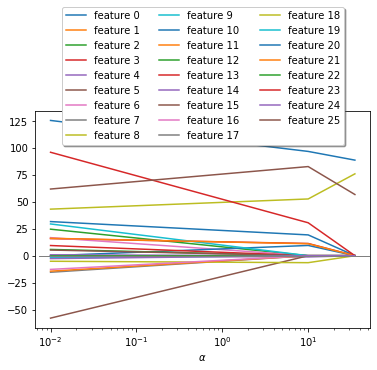

In [124]:
from sklearn.linear_model import Lasso
x_range = [0.01, 10,35]
train_score_list = []
test_score_list = []
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))
    coeff.append(lasso.coef_ )
coeff = np.array(coeff)

for i in range(0,26):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))
plt.axhline(y=0, xmin=0.01, xmax=35, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),ncol=3, fancybox=True, shadow=True)
plt.show()
        
    